# Challenge- Preparing Dataset for modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats

# DataSet Information

**Title:** Pima Indian Diabetes Dataset <br><br>
**Sources: ** https://www.kaggle.com/uciml/pima-indians-diabetes-database/home <br><br>
**Description of dataset:** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.<br><br>

## Input variables: <br>
**Pregnancies:** Number of times pregnant <br>
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
**BloodPressure:** Diastolic blood pressure (mm Hg)<br>
**SkinThinkness:** Triceps skin fold thickness (mm)<br>
**Insulin:** 2-Hour serum insulin (mu U/ml)<br>
**BMI:** Body mass index (weight in kg/(height in m)^2)<br>
**DiabetesPedigreeFunction:** Diabetes pedigree function<br>
**Age:** Age in years.<br><br>

## Output Variable: <br>
**Outcome:** 0 if person doesn't have diabetes, 1 if the person has diabetes<br>

### Basis for feature variable <br>
**Age:** Age in years.<br>
**Pregnancies:** Number of times pregnant <br>
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
**BloodPressure:** Diastolic blood pressure (mm Hg)<br>
**SkinThinkness:** Triceps skin fold thickness (mm)<br>
**BMI:** Body mass index (weight in kg/(height in m)^2)<br>

## Exploring Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df2 = df.loc[:, ['Outcome','Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]

In [6]:
df2.head()

,Outcome,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
0,1,50,6,148,72,35,0
1,0,31,1,85,66,29,0
2,1,32,8,183,64,0,0
3,0,21,1,89,66,23,94
4,1,33,0,137,40,35,168


In [7]:
df2.describe()

,Outcome,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.348958,33.240885,3.845052,120.894531,69.105469,20.536458,79.799479
std,0.476951,11.760232,3.369578,31.972618,19.355807,15.952218,115.244002
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,1.000000,99.000000,62.000000,0.000000,0.000000
50%,0.000000,29.000000,3.000000,117.000000,72.000000,23.000000,30.500000
75%,1.000000,41.000000,6.000000,140.250000,80.000000,32.000000,127.250000
max,1.000000,81.000000,17.000000,199.000000,122.000000,99.000000,846.000000


In [8]:
# Unique() values
for col in df2.columns:
    print('There are {} unique variables for {}.'.format((len(df[col].unique())), col))

There are 2 unique variables for Outcome.
There are 52 unique variables for Age.
There are 17 unique variables for Pregnancies.
There are 136 unique variables for Glucose.
There are 47 unique variables for BloodPressure.
There are 51 unique variables for SkinThickness.
There are 186 unique variables for Insulin.


### Examining Continuous variables

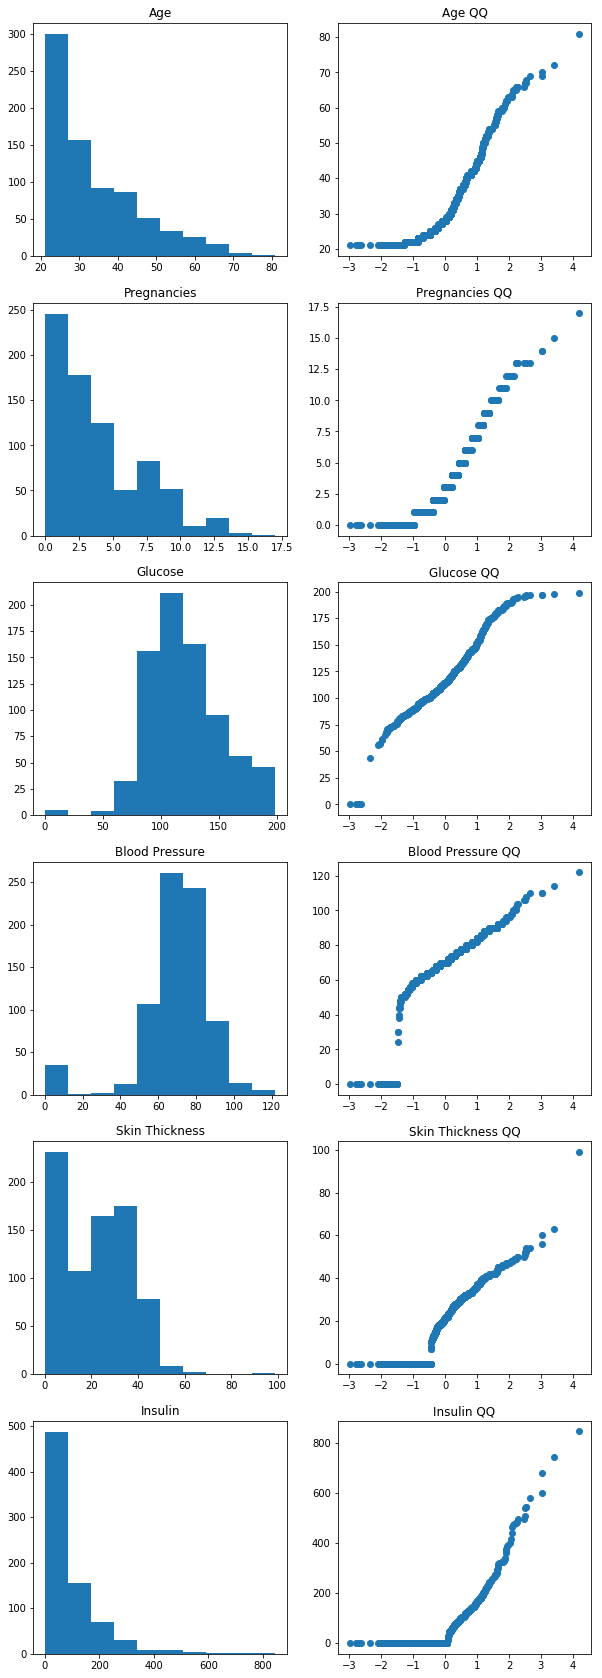

In [9]:
f, ax = plt.subplots(figsize=(10,30))
norm = sorted(np.random.normal(0,1,768))

plt.subplot(6,2,1)
plt.hist(df2['Age'])
plt.title('Age')

plt.subplot(6,2,2)
plt.scatter(norm, sorted(df2.Age))
plt.title('Age QQ')

plt.subplot(6,2,3)
plt.hist(df2['Pregnancies'])
plt.title('Pregnancies')

plt.subplot(6,2,4)
plt.scatter(norm, sorted(df2.Pregnancies))
plt.title('Pregnancies QQ')

plt.subplot(6,2,5)
plt.hist(df2['Glucose'])
plt.title('Glucose')

plt.subplot(6,2,6)
plt.scatter(norm, sorted(df2.Glucose))
plt.title('Glucose QQ')

plt.subplot(6,2,7)
plt.hist(df2['BloodPressure'])
plt.title('Blood Pressure')

plt.subplot(6,2,8)
plt.scatter(norm, sorted(df2.BloodPressure))
plt.title('Blood Pressure QQ')

plt.subplot(6,2,9)
plt.hist(df2['SkinThickness'])
plt.title('Skin Thickness')

plt.subplot(6,2,10)
plt.scatter(norm, sorted(df2.SkinThickness))
plt.title('Skin Thickness QQ')

plt.subplot(6,2,11)
plt.hist(df2['Insulin'])
plt.title('Insulin')

plt.subplot(6,2,12)
plt.scatter(norm, sorted(df2.Insulin))
plt.title('Insulin QQ')

plt.show()

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


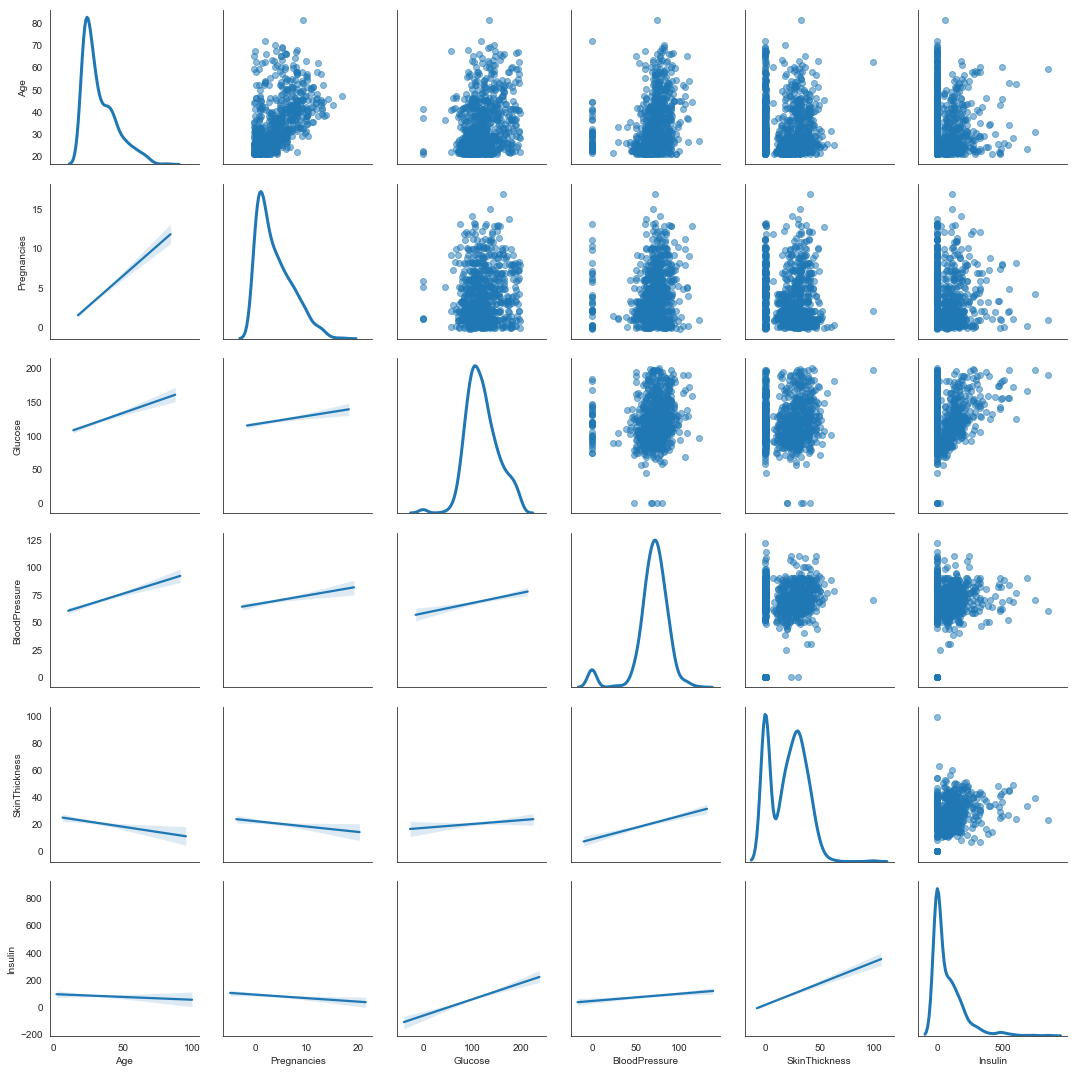

In [10]:
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Make a copy of the data to add jitter to and plot.
df_jittered = df2.loc[:, 'Age':'Insulin'].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                Outcome       Age  Pregnancies   Glucose  BloodPressure  \
Outcome        1.000000  0.238356     0.221898  0.466581       0.065068   
Age            0.238356  1.000000     0.544341  0.263514       0.239528   
Pregnancies    0.221898  0.544341     1.000000  0.129459       0.141282   
Glucose        0.466581  0.263514     0.129459  1.000000       0.152590   
BloodPressure  0.065068  0.239528     0.141282  0.152590       1.000000   
SkinThickness  0.074752 -0.113970    -0.081672  0.057328       0.207371   
Insulin        0.130548 -0.042163    -0.073535  0.331357       0.088933   

               SkinThickness   Insulin  
Outcome             0.074752  0.130548  
Age                -0.113970 -0.042163  
Pregnancies        -0.081672 -0.073535  
Glucose             0.057328  0.331357  
BloodPressure       0.207371  0.088933  
SkinThickness       1.000000  0.436783  
Insulin             0.436783  1.000000  


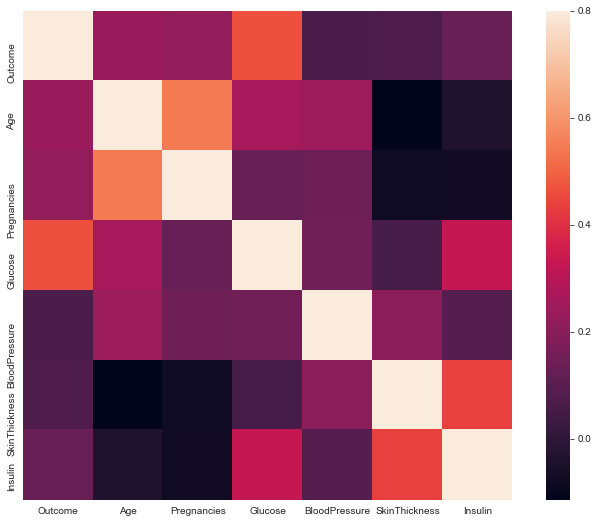

In [11]:
# Make the correlation matrix.
corrmat = df2.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize = (12,9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Examining Continuous and Categorical Data

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


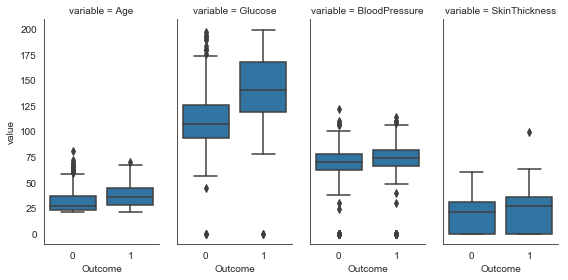

           Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Outcome                                                              
0        500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0   
1        268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0   

        BloodPressure             ...  Pregnancies       SkinThickness  \
                count       mean  ...          75%   max         count   
Outcome                           ...                                    
0               500.0  68.184000  ...          5.0  13.0         500.0   
1               268.0  70.824627  ...          8.0  17.0         268.0   

                                                           
              mean        std  min  25%   50%   75%   max  
Outcome                                                    
0        19.664000  14.889947  0.0  0.0  21.0  31.0  60.0  
1        22.164179  17.679711  0.0  0.

In [12]:
# Plot all the variables with boxplots for each outcome.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df2.loc[:,['Outcome','Age','Glucose','BloodPressure','SkinThickness']]
df_long = pd.melt(df_long, id_vars=['Outcome'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Outcome", "value")
plt.show()

# Descriptive statistics by group.
print(df2.groupby('Outcome').describe())

# Test whether group differences are significant.
for col in df2.loc[:,['Outcome','Age','Glucose','BloodPressure','SkinThickness']].columns:
    print(col)
    print(stats.ttest_ind(
        df2[df2['Outcome'] == 0][col].dropna(),
        df2[df2['Outcome'] == 1][col].dropna()
    ))

We can see that all variables have outliers respect to people having diabetes and ones who don't. Regarding the t-test we see that there are differences between people having diabetes and ones who don't  with respect to their Age, Glucose Level and Skin Thickness.

## Feature Selection:

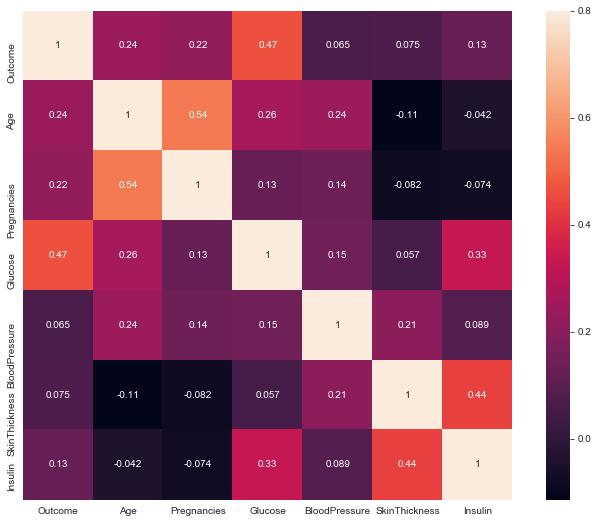

In [13]:
corrmat = df2.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

We can see that the Pregnancies and age are fairly correlated followed by Insulin and Skin Thickness. We can also see that the Outcome is fairly correlated to Glucose.

### First Feature: Age as category

In [14]:
# Making dummies.
# Also creating a data frame to hold our features.

features = pd.get_dummies(df2['Age'])
features['Female_50plus'] = np.where(df['Age']>=50, 1, 0)

# Check to make sure it worked.
print(df['Age'].groupby(features['Female_50plus']).describe())

               count       mean       std   min   25%   50%   75%   max
Female_50plus                                                          
0              679.0  30.022091  7.853063  21.0  23.0  28.0  36.0  49.0
1               89.0  57.797753  6.360710  50.0  52.0  57.0  62.0  81.0


### Second Feature: Composite variables for Pregnancies & Age 

In [15]:
means = df2[['Pregnancies','Age']].mean(axis=0)
stds = df2[['Pregnancies','Age']].std(axis=0)
features['Preg_age'] = ((df2[['Pregnancies','Age']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df2.loc[:, ['Pregnancies', 'Age']]
plotdf['Preg_age'] = features['Preg_age'] 
corrmat2 = plotdf.corr()

print(corrmat2)

             Pregnancies       Age  Preg_age
Pregnancies     1.000000  0.544341  0.878732
Age             0.544341  1.000000  0.878732
Preg_age        0.878732  0.878732  1.000000


### Third Feature: Composite Variable for Insulin and SkinThickness

In [16]:
means2 = df2[['Insulin','SkinThickness']].mean(axis=0)
stds2 = df2[['Insulin','SkinThickness']].std(axis=0)
features['Ins_skthick'] = ((df2[['Insulin','SkinThickness']] - means2) / stds2).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf2 = df2.loc[:, ['Insulin', 'SkinThickness']]
plotdf2['Ins_skthick'] = features['Ins_skthick'] 
corrmat3 = plotdf2.corr()

print(corrmat3)

                Insulin  SkinThickness  Ins_skthick
Insulin        1.000000       0.436783      0.84758
SkinThickness  0.436783       1.000000      0.84758
Ins_skthick    0.847580       0.847580      1.00000


### Fourth Feature: Dealing with Age non-normality

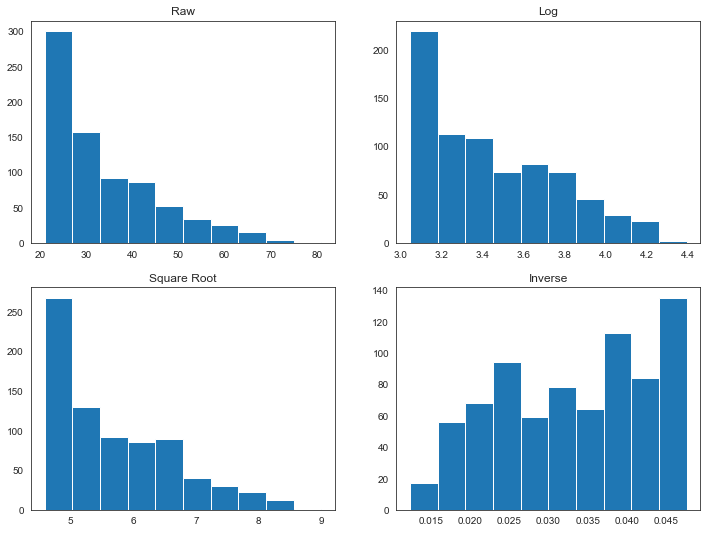

In [17]:
# Dealing with non-normality.

# Make a four-panel plot
# Distribution for age variable
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['Age'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['Age'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['Age'].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist(1/df2['Age'].dropna())
plt.title('Inverse')
plt.show()

In [18]:
features['Inverse_Age'] = 1/df2['Age'].dropna()

### Fifth feature: Pregnancy and outcome

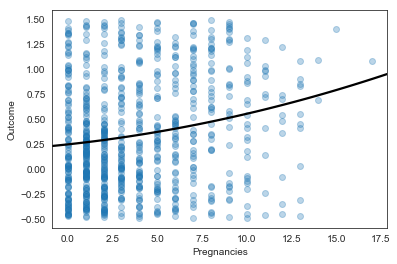

In [19]:

sns.regplot(
    df2['Pregnancies'],
    y=df2['Outcome'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [20]:
features['preg_squared'] = df2['Pregnancies'] * df2['Pregnancies']

### Sixth Feature: Age and Outcome

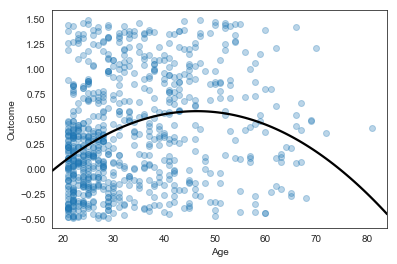

In [21]:
sns.regplot(
    df2['Age'],
    y=df2['Outcome'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [22]:
features['Age_squared'] = df2['Age'] * df2['Age']

### Seventh Feature: Skin thiness and Outcome 

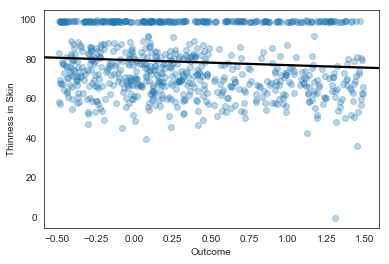

In [23]:
features['Skin_thinness'] = max(df['SkinThickness']) - df['SkinThickness']

sns.regplot(
    df2['Outcome'],
    features['Skin_thinness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Outcome')
plt.ylabel('Thinness in Skin')
plt.show()

### Eighth Feature: Glucose and Insulin

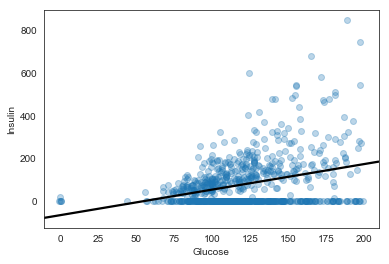

In [24]:
sns.regplot(
    df2['Glucose'],
    df2['Insulin'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

In [25]:
features['Glucose_sqrd'] = df2['Glucose']*df2['Glucose']

### Ninth Feature: Age and Blood Pressure

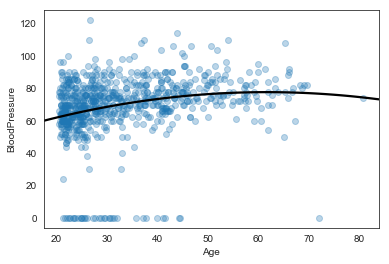

In [26]:
sns.regplot(
    df2['Age'],
    y=df2['BloodPressure'],
    x_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [27]:
features['BloodPressure'] = df2['BloodPressure']*df2['BloodPressure']

### Tenth Feature: Pregnancy and Age

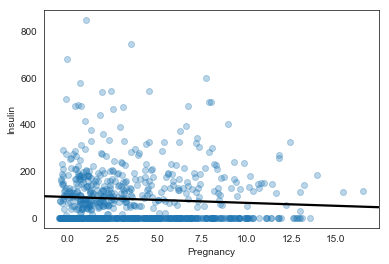

In [28]:
sns.regplot(
    df2['Pregnancies'],
    df2['Insulin'],
    x_jitter=.49,

    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Pregnancy')
plt.ylabel('Insulin')
plt.show()

In [29]:
features['Insulin_sqrd'] = df2['Insulin']*df2['Insulin']

### PCA for Glucose and Pregnancies

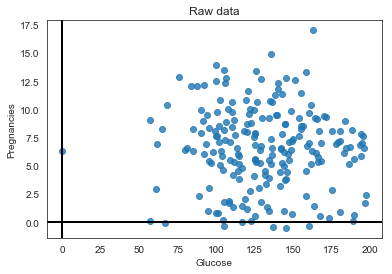

In [44]:
# Take a subset of the data for PCA

df_pca = df2.loc[(df2.Age >=40),['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].dropna()

t = sns.regplot(
    'Glucose',
    'Pregnancies',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

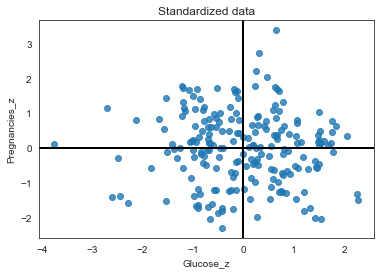

In [46]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_pca['Glucose_z'] = (df_pca['Glucose'] - df_pca['Glucose'].mean()) / df_pca['Glucose'].std()
df_pca['Pregnancies_z'] = (df_pca['Pregnancies'] - df_pca['Pregnancies'].mean()) / df_pca['Pregnancies'].std()

t = sns.regplot(
    'Glucose_z',
    'Pregnancies_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

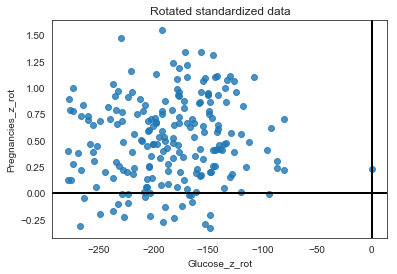

In [47]:
# Rotating the data so that the axes roughly match to vector above

df_pca['Glucose_z_rot'] = math.cos(40) * df_pca['Glucose'] - math.sin(40) * df_pca['Glucose']
df_pca['Pregnancies_z_rot'] = math.sin(40) * df_pca['Pregnancies'] + math.cos(40) * df_pca['Pregnancies']

t = sns.regplot(
    'Glucose_z_rot',
    'Pregnancies_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

### PCA for Pregnancies and Insulin

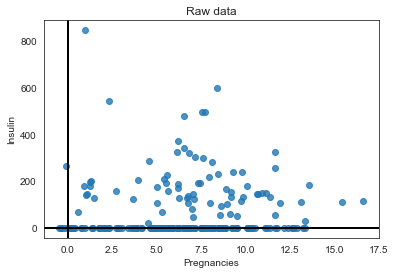

In [48]:
t2 = sns.regplot(
    'Pregnancies',
    'Insulin',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t2.axhline(0, color='k', linestyle='-', linewidth=2)
t2.axvline(0, color='k', linestyle='-', linewidth=2)
t2.axes.set_title('Raw data')
plt.show()

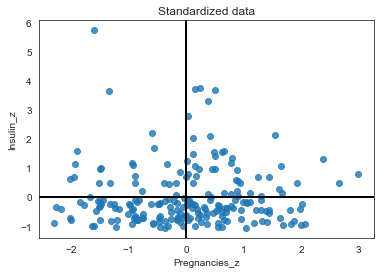

In [49]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_pca['Insulin_z'] = (df_pca['Insulin'] - df_pca['Insulin'].mean()) / df_pca['Insulin'].std()

t2 = sns.regplot(
    'Pregnancies_z',
    'Insulin_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t2.axhline(0, color='k', linestyle='-', linewidth=2)
t2.axvline(0, color='k', linestyle='-', linewidth=2)
t2.axes.set_title('Standardized data')
plt.show()

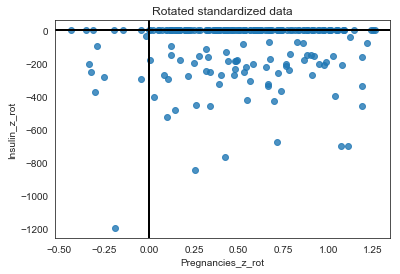

In [50]:
# Rotating the data so that the axes roughly match to vector above

df_pca['Insulin_z_rot'] = math.cos(40) * df_pca['Insulin'] - math.sin(40) * df_pca['Insulin']


t2 = sns.regplot(
    'Pregnancies_z_rot',
    'Insulin_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t2.axhline(0, color='k', linestyle='-', linewidth=2)
t2.axvline(0, color='k', linestyle='-', linewidth=2)
t2.axes.set_title('Rotated standardized data')
plt.show()

### PCA for Age and SkinThickness

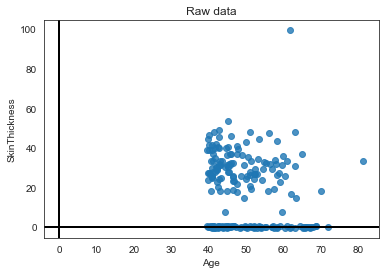

In [51]:
t3 = sns.regplot(
    'Age',
    'SkinThickness',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t3.axhline(0, color='k', linestyle='-', linewidth=2)
t3.axvline(0, color='k', linestyle='-', linewidth=2)
t3.axes.set_title('Raw data')
plt.show()

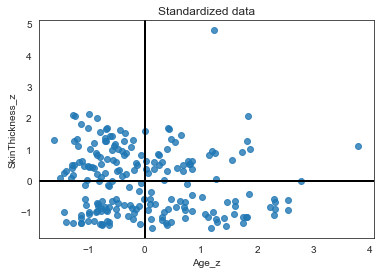

In [53]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.

df_pca['Age_z'] = (df_pca['Age'] - df_pca['Age'].mean()) / df_pca['Age'].std()
df_pca['SkinThickness_z'] = (df_pca['SkinThickness'] - df_pca['SkinThickness'].mean()) / df_pca['SkinThickness'].std()

t3 = sns.regplot(
    'Age_z',
    'SkinThickness_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t3.axhline(0, color='k', linestyle='-', linewidth=2)
t3.axvline(0, color='k', linestyle='-', linewidth=2)
t3.axes.set_title('Standardized data')
plt.show()

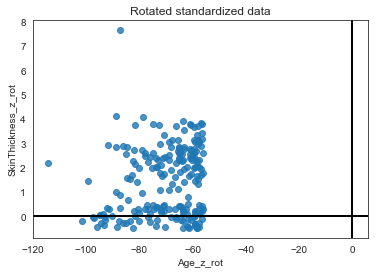

In [54]:
# Rotating the data so that the axes roughly match to vector above

df_pca['Age_z_rot'] = math.cos(40) * df_pca['Age'] - math.sin(40) * df_pca['Age']
df_pca['SkinThickness_z_rot'] = math.sin(40) * df_pca['SkinThickness'] + math.cos(40) * df_pca['SkinThickness']

t3 = sns.regplot(
    'Age_z_rot',
    'SkinThickness_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t3.axhline(0, color='k', linestyle='-', linewidth=2)
t3.axvline(0, color='k', linestyle='-', linewidth=2)
t3.axes.set_title('Rotated standardized data')
plt.show()

### Covariance Matrix

In [67]:
# Take a subset of the data for PCA and drop missing values because PCA cannot handle them. 
# We could also impute, but missingness is quite low so dropping missing rows is unlikely to create bias.

df_pca2 = df.loc[:,['Age', 'Pregnancies', 'Insulin', 'SkinThickness','BloodPressure']].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation of 1

X = StandardScaler().fit_transform(df_pca2)

# The NumPy covariance function assumes that variables are represented by rows, not columns, so we transpose X

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00130378  0.54505093 -0.04221793 -0.11411885  0.23984024]
 [ 0.54505093  1.00130378 -0.07363049 -0.08177826  0.14146618]
 [-0.04221793 -0.07363049  1.00130378  0.43735204  0.08904933]
 [-0.11411885 -0.08177826  0.43735204  1.00130378  0.2076409 ]
 [ 0.23984024  0.14146618  0.08904933  0.2076409   1.00130378]]


c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Calculating Eigen Values and Eigen Vectors

In [68]:
# Calculating eigenvalues and eigenvectors 

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.64557036]
 [ 0.62537194]
 [-0.24767819]
 [-0.26796785]
 [ 0.2428942 ]]
Eigenvalue 1: 1.6831070790031362
----------------------------------------
Eigenvector 2: 
[[0.17546037]
 [0.13344577]
 [0.58083979]
 [0.62532237]
 [0.4722319 ]]
Eigenvalue 2: 1.514878607814861
----------------------------------------
Eigenvector 3: 
[[-0.16636112]
 [-0.3432105 ]
 [-0.46629259]
 [-0.04861233]
 [ 0.79670484]]
Eigenvalue 3: 0.8254924756113051
----------------------------------------
Eigenvector 4: 
[[ 0.68907929]
 [-0.58563285]
 [-0.21668359]
 [ 0.29684758]
 [-0.21710279]]
Eigenvalue 4: 0.42662726240741944
----------------------------------------
Eigenvector 5: 
[[ 0.22348662]
 [-0.3610303 ]
 [ 0.58043096]
 [-0.66834387]
 [ 0.19007164]]
Eigenvalue 5: 0.5564134799872642
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.33618311 0.30258122 0.16488352 0.08521435 0.1111378 ]


 **Eigenvectors 1 and 2 account for over 63% of the variance in the dataset and could be used for accurate predictions. For increased accuracy, keep eigenvector 3, which would boost the total variance to 80%.**

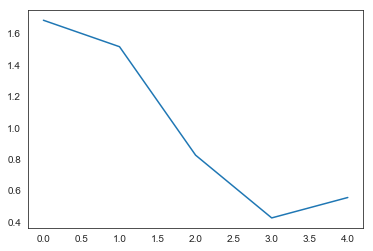

In [69]:
plt.plot(eig_val_cov)
plt.show()

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


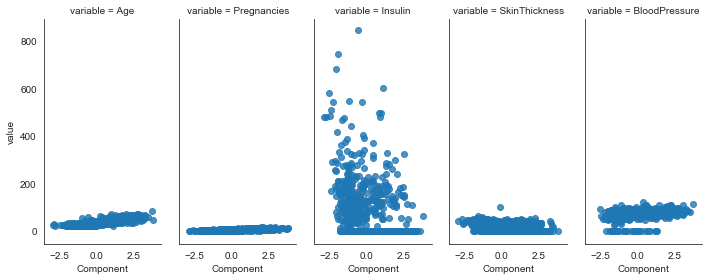

In [71]:
# Create P, which we will use to transform Cx into Cy to get Y, the dimensionally-reduced representation of X

P = eig_vec_cov[:, 0]

# Transform X into Y

Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes

data_to_plot = df_pca2[['Age', 'Pregnancies', 'Insulin', 'SkinThickness','BloodPressure']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.33618311 0.30258122 0.16488352 0.1111378 ]


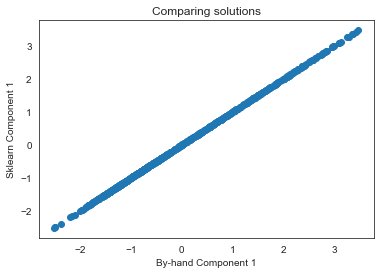

In [72]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()